In [168]:
import os
import sys
import argparse
import numpy as np
import numba as nb
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
from tools import merge_matrix, hic_norm, clean_matrix

In [169]:
mark_path = "/home/lmh/work/repos/MMSR_test/analyse/TAD_mark"

hr_mark_path = os.path.join(mark_path, "hr_down.txt")
complete_mark_path = os.path.join(mark_path, "complete_down.txt")
enhanced_mark_path = os.path.join(mark_path, "enhanced_down.txt")
mark_paths = [hr_mark_path, complete_mark_path, enhanced_mark_path]

hr_path = '/data1/lmh_data/MMSR_complete/draw/hr_chr19_1000b.np
complete_path = '/data1/lmh_data/MMSR_complete/draw/replaced_chr19_1000b.npz'
complete_enhanced_path = '/data1/lmh_data/MMSR_complete/draw/replaced_chr19_result.npz'

In [170]:
hr = np.load(hr_path)['hic'].astype(float)
complete = np.load(complete_path)['hic'].astype(float)
complete_enhanced = np.load(complete_enhanced_path)['out'].astype(float)

In [171]:
for i in range(complete_enhanced.shape[0]):
    complete_enhanced[i][0] = (complete_enhanced[i][0] + complete_enhanced[i][0].T)/2

matrixs = [hr, complete, complete_enhanced]
for i in range(0, len(matrixs)):
    matrixs[i] = merge_matrix(matrixs[i])
    matrixs[i] = np.triu(matrixs[i]).T + np.triu(matrixs[i])

matrixs[0] = hic_norm(matrixs[0])
matrixs[1] = hic_norm(matrixs[1])

matrixs, Min = clean_matrix(matrixs)

In [172]:
@nb.jit()
def down_sample(matrix, ratio):
    dim = matrix.shape
    _l = int(dim[0]/ratio)
    _m = np.zeros((_l, _l))
    for i in range(_l):
        for j in range(_l):
            _m[i, j] = matrix[i*ratio:(i+1)*ratio, j*ratio:(j+1)*ratio].mean()
    return _m

down_matrixs = []
for i in range(len(matrixs)):
    down_matrixs.append(down_sample(matrixs[i], 25))

In [247]:
start_bin, end_bin = 0, 200

draw_infos = []
for _path in mark_paths:
    draw_info = []
    with open(_path, 'r') as file_object:
        data = file_object.readlines()[1:]
        for i in range(len(data)):
            _s = str.split(data[i])
            if start_bin > int(int(_s[0]) / 25000) + 1:
                continue
            if end_bin < int(int(_s[1]) / 25000) + 1:
                continue
            draw_info.append((int(int(_s[0]) / 25000) + 1, int(int(_s[1]) / 25000) + 1))
    draw_infos.append(draw_info)

In [248]:
part_matrixs = []
for i in range(len(matrixs)):
    part_matrixs.append(down_matrixs[i][start_bin:end_bin, start_bin:end_bin])

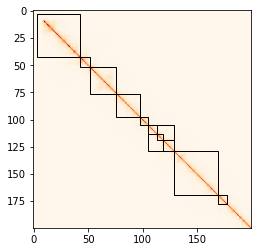

In [249]:
# hr
index = 0
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
    rect = patches.Rectangle((top_left, top_left), length, length, fill=False, edgecolor = 'black', linewidth=1)
    currentAxis.add_patch(rect)
plt.savefig('fig/fig7_hr_TAD.pdf')
plt.show()

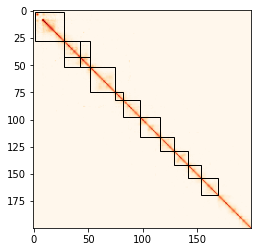

In [250]:
# complete
index = 1
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
    rect = patches.Rectangle((top_left, top_left), length, length, fill=False, edgecolor = 'black', linewidth=1)
    currentAxis.add_patch(rect)
plt.savefig('fig/fig7_complete_TAD.pdf')
plt.show()

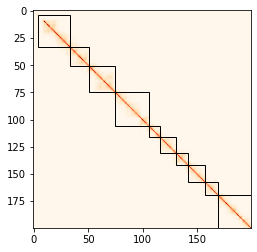

In [251]:
# complete enhanced
index = 2
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
    rect = patches.Rectangle((top_left, top_left), length, length, fill=False, edgecolor = 'black', linewidth=1)
    currentAxis.add_patch(rect)
plt.savefig('fig/fig7_enhanced_TAD.pdf')
plt.show()

In [254]:
start_bin, end_bin = 0, 1000
part_matrixs = []
for i in range(len(matrixs)):
    part_matrixs.append(matrixs[i][start_bin:end_bin, start_bin:end_bin])

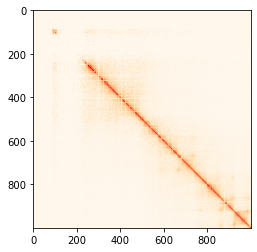

In [255]:
# hr
index = 0
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
plt.savefig('fig/fig7_hr.pdf')
plt.show()

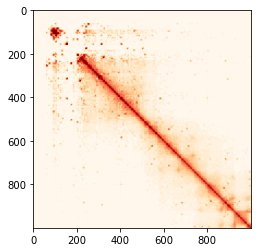

In [256]:
# complete
index = 1
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
plt.savefig('fig/fig7_complete.pdf')
plt.show()

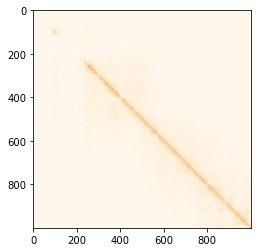

In [257]:
# enhanced
index = 2
plt.imshow(part_matrixs[index], cmap=plt.cm.get_cmap('OrRd'))
currentAxis=plt.gca()
for i in range(len(draw_infos[index])):
    top_left = draw_infos[index][i][0] - start_bin
    length = draw_infos[index][i][1] - draw_infos[index][i][0]
plt.savefig('fig/fig7_enhanced.pdf')
plt.show()